### Analyzing the Stroop Effect


(1) What is the independent variable? What is the dependent variable?

The independent variable is the time it takes to name the word ink colors in equally-sized word lists. The dependent variable is the category of the list: whether the words and their colors are congruent or incongruent. 

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

An important consideration in defining the Null Hypothesis is which of the two types of error (Type I and Type II) lead to the worst outcome. The Null Hypothesis should be selected such that the worst outcome corresponds to a Type I error. First, the worst outcome must be identified. In this case, it would be the conclusion that an effect exists that causes the reading times of congruent and incongruent lists to be significantly different, when in fact no such effect exists. Falsely concluding that an effect exists could lead to developing applications that attempt to utilize the effect, which would at best be wasted effort but could also lead to poor decisions affecting patient treatment, for example. A Type I error occurs when the Null Hypothesis is true but there is a decision to reject it in favour of the Alternative Hypothesis (a false positive).

It should be considered whether the results are independent of each other or not. In this case, each pair of results (each row in the data) is associated with a single person (an assumption from the instructions), i.e. the results are related. The statistical test will calculate the difference for each pair of results and then test the mean of those differences to see if it is significantly different from zero (a paired T-Test). 

So the selected Null Hypothesis is that there is no significant difference between the reading times of congruent and incongruent lists, i.e. the mean of the differences of each pair is zero. 

The Alternative Hypothesis is therefore that the the mean of the differences of each pair is significantly different from zero. 

There are two ways in which the hypotheses could be defined: one-tailed and two-tailed. A two-tailed hypothesis allows for the possibility that either of the two lists has greater total reading time that the other. A one-tailed hypothesis tests only for the expected result (from knowledge of the anticipated effect), i.e. that the total reading time of the incongruent list is greater than that of the congruent list. Note that the provided function in Python that is used below to conduct the test is a two-tailed test. 

The two-tailed definition (used in the test below) is:

**Null Hypothesis**: 
**$H_0 :$  $\mu_d$** = 0

The mean of the paired differences is equal to zero. 

**Alternative Hypothesis**: 
**$H_a :$  $\mu_d$** <> 0

The mean of the paired differences is not equal to zero.

The one-tailed definition (preferred) is:

**Null Hypothesis**: 
**$H_0 :$  $\mu_d$** <= 0 where d = difference = incongruent - congruent

The mean of the paired differences is less than or equal to zero. 

**Alternative Hypothesis**: 
**$H_a :$  $\mu_d$** > 0 where d = difference = incongruent - congruent

The mean of the paired differences is greater than zero.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Read in the data file into a pandas dataframe.
df = pd.read_csv('stroopdata.csv')

# Examine the structure and content of the data.
print(df.info(), df)

# Generate summary statistics for the data.
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes
None     Congruent  Incongruent
0      12.079       19.278
1      16.791       18.741
2       9.564       21.214
3       8.630       15.687
4      14.669       22.803
5      12.238       20.878
6      14.692       24.572
7       8.987       17.394
8       9.401       20.762
9      14.480       26.282
10     22.328       24.524
11     15.298       18.644
12     15.073       17.510
13     16.929       20.330
14     18.200       35.255
15     12.130       22.158
16     18.495       25.139
17     10.639       20.429
18     11.344       17.425
19     12.369       34.288
20     12.944       23.894
21     14.233       17.960
22     19.710       22.058
23     16.004       21.157


,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


Comparing measures of **central tendency**:

The mean of the congruent set is 14.1 seconds (s), for the incongruent set 22.0s.
The median of the congruent set is 14.4s, for the incongruent set 21.0s. (Shown as '50%' in the table).

The central position of the incongruent set is ca. 7s higher than that of the congruent set. 
Mean and median are similar, suggesting a symmetrical distribution (see visualizations below).

Comparing measures of **variability**:

The standard deviation of the congruent set is 3.6s, for the incongruent set 4.8s. (From 'std' in the table).
The range of the congruent set is 13.7s, for the incongruent set 19.6s. (From 'max'-'min' in the table).

The variation in the incongruent set is higher than that in the congruent set. This may be due to the presence of outliers in the incongruent set.  

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

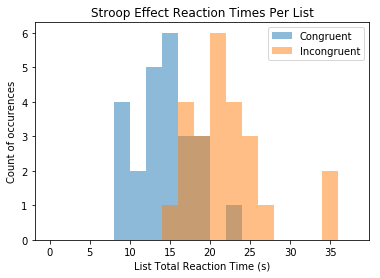

In [57]:
# Chose 2s bins to see more detail of the distribution.
kwargs = dict(histtype='stepfilled', alpha=0.5, bins=np.arange(0,40,2))
plt.hist(df.Congruent, label='Congruent', **kwargs)
plt.hist(df.Incongruent, label='Incongruent', **kwargs)
plt.title("Stroop Effect Reaction Times Per List")
plt.legend(loc='upper right')
plt.xlabel("List Total Reaction Time (s)")
plt.ylabel("Count of occurences")
plt.show()

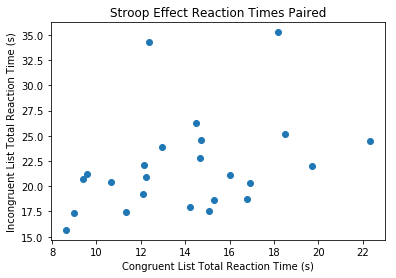

In [58]:
plt.scatter(df.Congruent, df.Incongruent)
plt.title("Stroop Effect Reaction Times Paired")
plt.xlabel("Congruent List Total Reaction Time (s)")
plt.ylabel("Incongruent List Total Reaction Time (s)")
plt.show()

The incongruent distribution appears to be shifted to the right, implying a consistent additional delay in the response times for that set. There are two values (34.3s, 35.3s) in the incongruent set that are higher than the rest of the incongruent distribution and which contribute to that distribution having a higher standard deviation and range.

There is considerable variation in the relationship between the congruent list total reaction time and that of the incongruent list. Using a paired T-test will exclude this "person to person" variation. 

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

The assumptions for the paired T-test apply to the calculated differences:

a. continuous variable - yes, difference of total response times

b. independent observations - yes, assumed from the instructions and no evidence found in the data

c. should not contain any outliers - check needed

d. approximately normally distributed - check needed

In [59]:
# Generate the difference values.
# The direction (sign) of the difference was selected for the preferred hypotheses definition above.
df = df.assign(Difference = df['Incongruent'] - df['Congruent'])

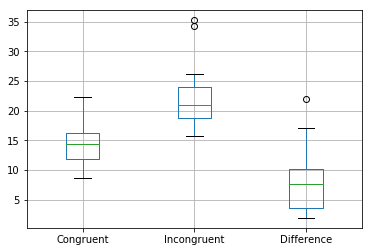

In [60]:
# Assumption c: check and handle the potential outliers.
df.boxplot();

One outlier is shown in the differences and will need to be removed. However, there are two clear outliers in the incongruent set. It was decided to remove the incongruent outliers first and then see if there are any remaining in the differences.

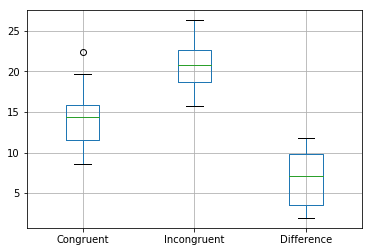

In [61]:
# The two outliers in the incongruent set may disrupt the following parametric methods. 
# Therefore those rows are removed. 
df2 = df.query('Incongruent < 30')
df2.boxplot();

Removing the two incongruent outliers creates a new one for the congruent distribution (not however far away from the body of the distribution), but there are no more outliers for the differences. Since the test is performed on the differences, the data is now ready for a check for normality.

Difference data normal: Test Statistic = 0.9195032715797424, p-value = 0.07423953711986542


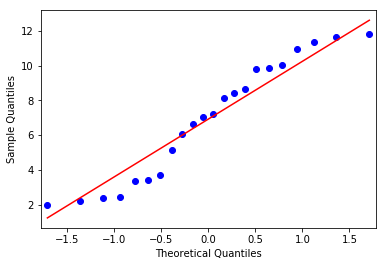

In [62]:
# Assumption d: for the paired T Test the difference of each pair should follow a normal distribution.
# The null hypothesis is that the difference values are taken from a normal population.
# The null hypothesis will be rejected if the p-value is less than or equal to alpha = 0.05.
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
statistic, p_value = shapiro(df2.Difference)
print('Difference data normal: Test Statistic = {}, p-value = {}'.format(statistic, p_value))
qqplot(df2.Difference, line='s')
plt.show()

Although the p-value is close to the alpha significance level of 0.05, the Null Hypothesis cannot be rejected, so the requirement that it is a normal distribution is confirmed. For the paired T-test only approximate normality is required, so there is no reason for concern. 

In [63]:
# Since the assumptions have been confirmed, continue with parametric tests.
# The null hypothesis is that the mean of the paired differences between congruent and incongruent is equal to 0.
# The null hypothesis will be rejected if the two-tailed p-value is less than or equal to alpha = 0.05
# (So each tail direction has an alpha threshold of 0.025).
# Note that this is not the preferred hypothesis test but the function does not support one-tailed tests.
# Another approach could be to choose alpha = 0.1 so that each tail has 0.05. But here the more stringent
# requirement set by alpha 0.05 will be used. 
from scipy.stats import ttest_rel 
statistic, p_value = ttest_rel(df2.Incongruent, df2.Congruent)
print('Test mean of paired differences: Test Statistic = {}, p-value = {}'.format(statistic, p_value))

Test mean of paired differences: Test Statistic = 9.541099908492178, p-value = 4.381891625923132e-09


In [64]:
# For comparison, calculate the critical value of the test statistic beyond which the Null Hypotheses is rejected.
from scipy.stats import t
alpha = 0.025
ddof = df2.shape[0] - 1   # degrees of freedom is n - 1
cstat = t.ppf(1 - alpha, ddof)
print('Critical Test Statistic = {}'.format(cstat))

Critical Test Statistic = 2.079613844727662


The significance threshold alpha was set to 0.05 i.e. 5%, which is the maximum rate of Type I errors allowed when rejecting the Null Hypothesis. It corresponds to a confidence level of 95% and is equally distributed in both directions of the two tailed test. Each tail allows therefore maximum 2.5% Type I errors. The critical statistic for the 2.5% significance level in the positive direction is 2.1.

The test statistic of 9.5 was much higher than the critical statistic value of 2.1, which corresponds to the very low p-value, which approaches zero.

The p-value is very low, well below alpha, so the Null Hypotheses must be rejected in favour of the Alternative Hypothesis. This confirms the visualized results, that there is a significant difference between the total reading times of the congruous and incongruous lists. The direction of the difference is positive, i.e. the time for the incongruous list is higher than the time for the congruous list. The results confirm other reported experiments of the Stroop Effect.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

The test introduces incongruity between interpreting the meaning of words and colors of words and so mental processes are being "interfered" with. The automatic process of identifying words, which is very fast, must be consciously inhibited.

The delay in response times, accumulated over reading the complete list, is likely due to factors such as *selective attention, cognitive flexibility and processing speed* (source: Wikipedia article on Stroop Effect). Tests based on the Stroop effect can be used to assess these factors in patients to assist diagnosis, 

Similar tasks such as warped words, spatial clues, or sizes of numbers show similar results. Practical applications might be in situations where a fast response is needed, for example in sorting components into bins, and conflicting meanings can be eliminated to optimize times. For example, color-coding both bins and components. 